# Mushroom Dataset

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('mushrooms.csv')

print(data.shape)

data.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import tree

from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus
import os

data = pd.read_csv('mushrooms.csv')

X = data.iloc[:,1:]
y = data['class']

le = preprocessing.LabelEncoder()

trans_data = []
for col in range(len(X.columns)):
    le.fit(X.iloc[:,col])
    transformed_data = le.transform(X.iloc[:,col]) 
    trans_data.append(transformed_data)

trans_data = np.array(trans_data)
trans_data = trans_data.transpose()
X = trans_data

le.fit(y)
target_data = le.transform(y) 
y = target_data

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [11]:
X_train

array([[3, 3, 2, ..., 7, 4, 4],
       [3, 2, 4, ..., 7, 1, 6],
       [2, 0, 4, ..., 2, 5, 0],
       ...,
       [5, 0, 8, ..., 3, 0, 1],
       [5, 3, 2, ..., 7, 4, 4],
       [2, 0, 9, ..., 1, 4, 4]])

In [12]:
y_train

array([1, 0, 0, ..., 0, 1, 1])

# SVM

In [13]:
from sklearn.svm import SVC 

kernel_l = ['linear', 'poly', 'rbf', 'sigmoid']
c_l = [1,3,5,7,9,11,13,15]

results = {k:{c:{} for c in c_l} for k in kernel_l}

for k in kernel_l:
    for c in c_l:
        start = time.time()
        svm_model = SVC(kernel = k, C = c).fit(X_train, y_train) 
        end = time.time() - start
        svm_predictions = svm_model.predict(X_test)

        accuracy = svm_model.score(X_test, y_test)
        cm = confusion_matrix(y_test, svm_predictions) 

        results[k][c] = {'accuracy':accuracy, 'cm':cm, 'time':end}

In [21]:
results

{'linear': {1: {'accuracy': 0.9569319114027892,
   'cm': array([[1264,   59],
          [  46, 1069]]),
   'time': 2.951266050338745},
  3: {'accuracy': 0.9774405250205086,
   'cm': array([[1295,   28],
          [  27, 1088]]),
   'time': 3.302686929702759},
  5: {'accuracy': 0.9774405250205086,
   'cm': array([[1295,   28],
          [  27, 1088]]),
   'time': 4.25551700592041},
  7: {'accuracy': 0.9774405250205086,
   'cm': array([[1295,   28],
          [  27, 1088]]),
   'time': 8.04716420173645},
  9: {'accuracy': 0.9856439704675964,
   'cm': array([[1295,   28],
          [   7, 1108]]),
   'time': 9.032968997955322},
  11: {'accuracy': 0.9856439704675964,
   'cm': array([[1295,   28],
          [   7, 1108]]),
   'time': 10.16142725944519},
  13: {'accuracy': 0.9856439704675964,
   'cm': array([[1295,   28],
          [   7, 1108]]),
   'time': 7.7779622077941895},
  15: {'accuracy': 0.9856439704675964,
   'cm': array([[1295,   28],
          [   7, 1108]]),
   'time': 13.34662

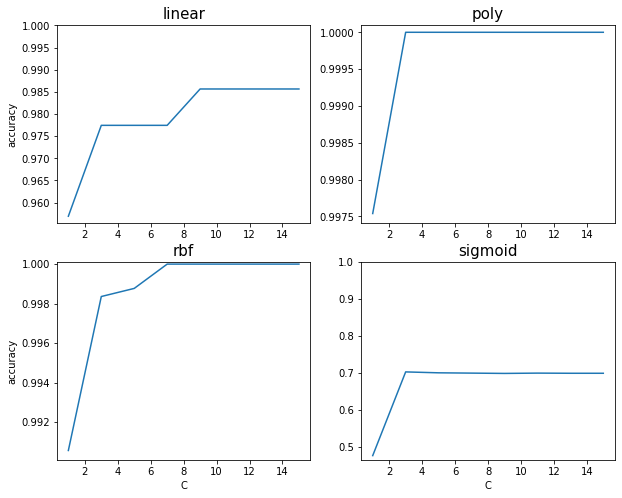

In [14]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches((10,8))

fig_num = 0

for kernel in kernel_l:
    accuracy_l = [v['accuracy'] for k,v in results[kernel].items()]
    
    axs[fig_num//2, fig_num%2].set_title(kernel, size=15)
    axs[fig_num//2, fig_num%2].plot(c_l, accuracy_l)
    axs[fig_num//2, fig_num%2].set_ylim(top=1.0001)
    if fig_num%2 == 0:
        axs[fig_num//2, fig_num%2].set_ylabel('accuracy', size=10)
    if fig_num >= 2:
        axs[fig_num//2, fig_num%2].set_xlabel('C', size=10)
    fig_num += 1

In [15]:
results['linear'][13]

{'accuracy': 0.9856439704675964,
 'cm': array([[1295,   28],
        [   7, 1108]]),
 'time': 7.7779622077941895}

In [17]:
results['poly'][13]

{'accuracy': 1.0,
 'cm': array([[1323,    0],
        [   0, 1115]]),
 'time': 0.27104711532592773}

In [20]:
results['sigmoid'][7]

{'accuracy': 0.699343724364233,
 'cm': array([[938, 385],
        [348, 767]]),
 'time': 0.7543470859527588}

No handles with labels found to put in legend.


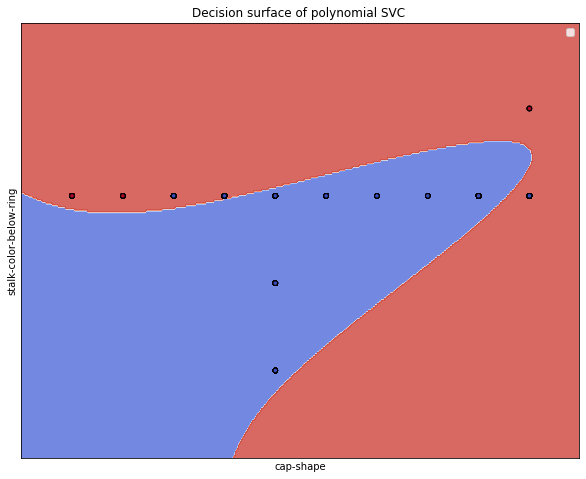

In [127]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# iris = datasets.load_iris()
att1 = 2
att2 = 16

X = X_train[:,[att1,att2]]
y = y_train

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='poly', C=5)
clf = model.fit(X, y)

fig, ax = plt.subplots()
fig.set_size_inches((10,8))

# title for the plots
title = ('Decision surface of polynomial SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel(f'{data.columns[att2-1]}')
ax.set_xlabel(f'{data.columns[att1-1]}')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

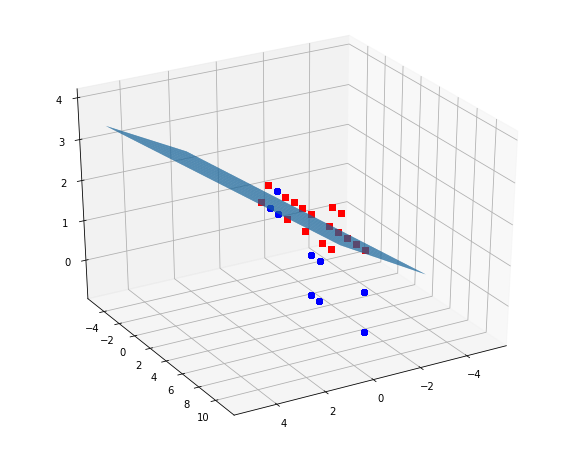

In [128]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

# iris = datasets.load_iris()
X = X_train[:,[6,8,16]]  # we only take the first three features.
Y = y_train

#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)


fig = plt.figure()
fig.set_size_inches((10,8))

ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

In [146]:
data.columns[[7,9,17]]

Index(['gill-spacing', 'gill-color', 'veil-color'], dtype='object')

# Compare with Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

depth_l = [2,5,7,9]

DT_results = {}

for d in depth_l:    
    dtree_model = DecisionTreeClassifier(max_depth = d).fit(X_train, y_train) 
    dtree_predictions = dtree_model.predict(X_test) 
    
    accuracy = dtree_model.score(X_test, y_test)
    
    cm = confusion_matrix(y_test, dtree_predictions) 

    DT_results[d] = {'accuracy':accuracy, 'cm':cm, 'tree':dtree_model}

Text(0.5, 1.0, 'accuracy for each depth')

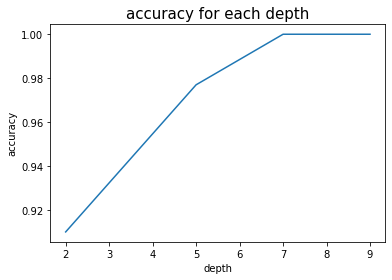

In [130]:
plt.plot(depth_l, [DT_results[d]['accuracy'] for d in depth_l])
plt.xlabel('depth', size=10)
plt.ylabel('accuracy', size=10)
plt.title('accuracy for each depth', size=15)


In [147]:
feature_names = data.columns.tolist()[1:]
target_names = ['edible','poison']

dt_dot_data = tree.export_graphviz(DT_results[7]['tree'], out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_names,
                                  filled = True, rounded = True,
                                  special_characters = True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
image = Image(dt_graph.create_png())

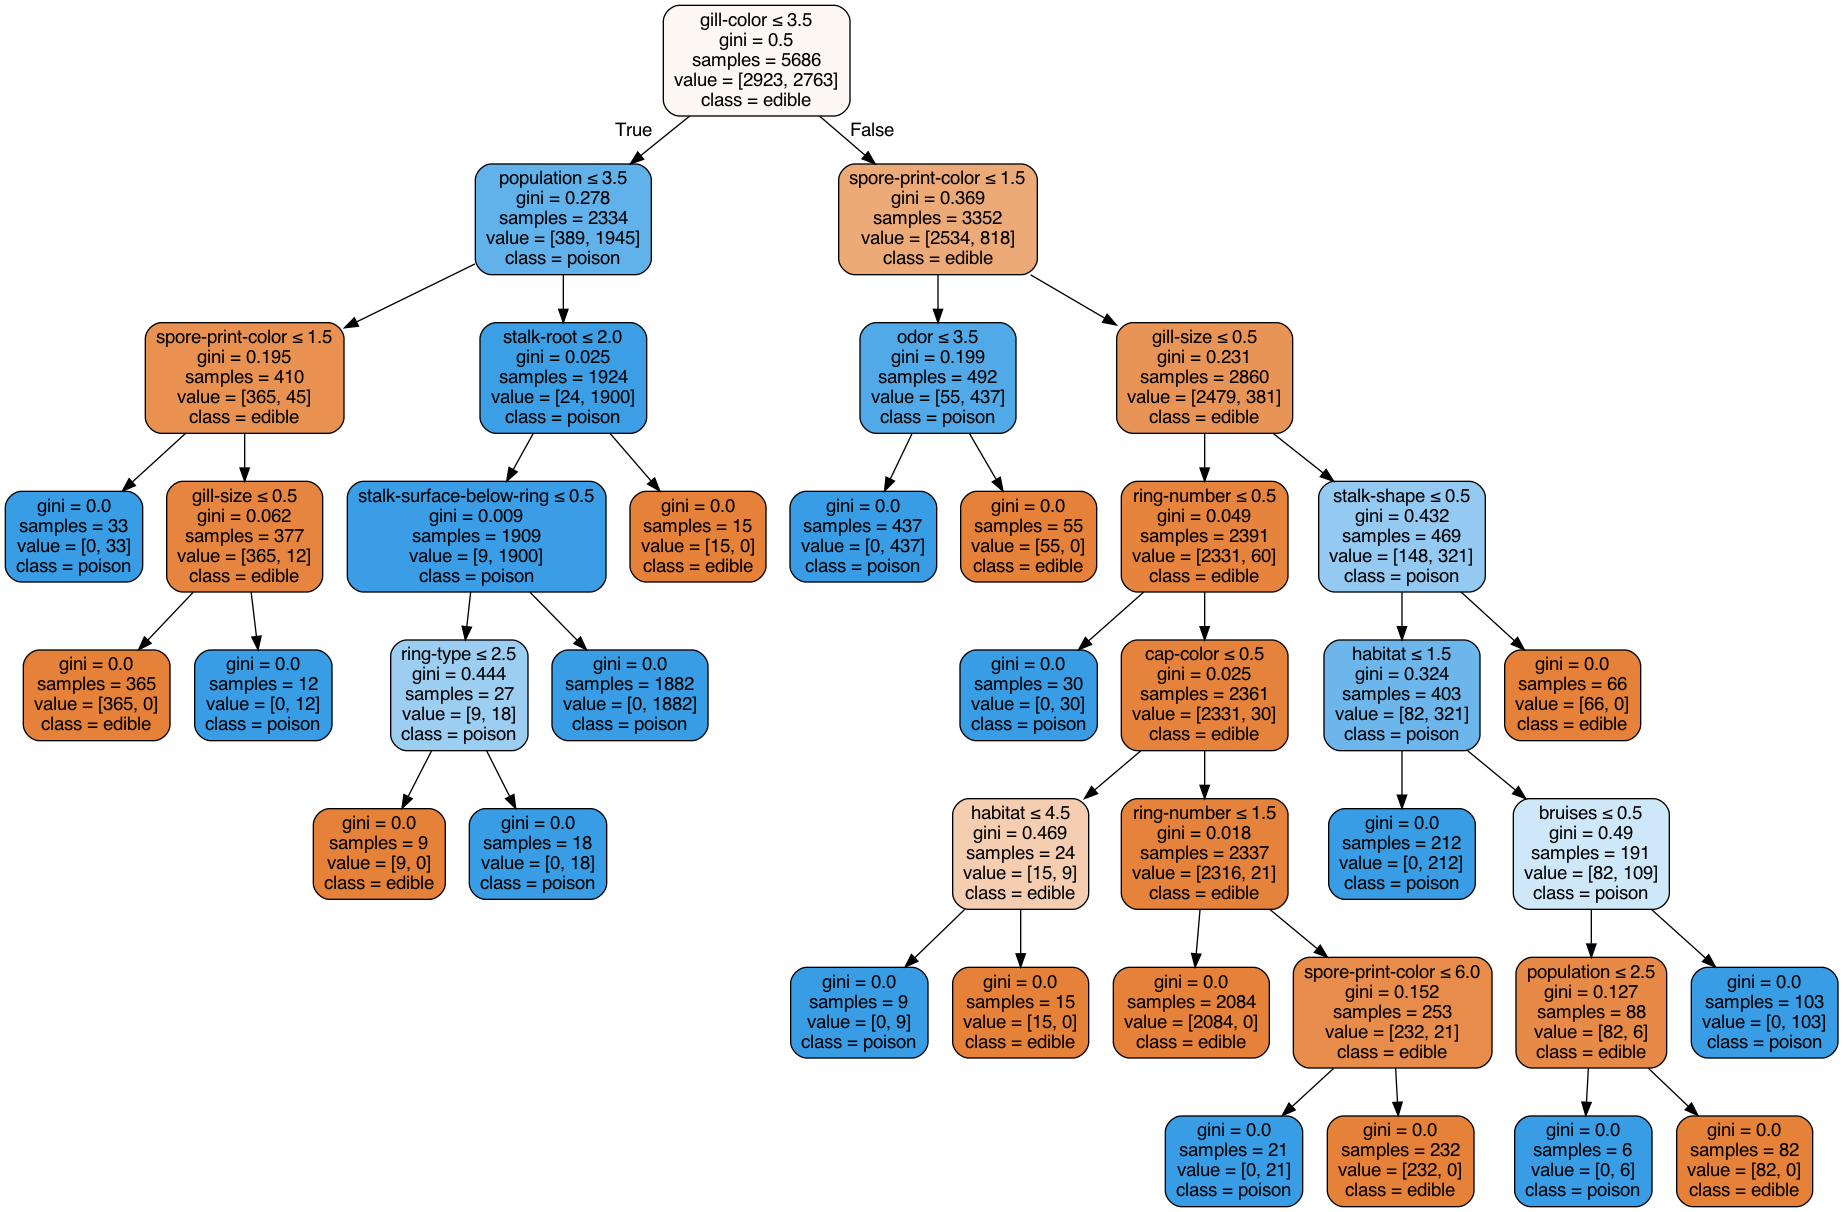

In [148]:
image